In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fake_bills.csv', delimiter = ';', decimal='.')
df.head()
df.dropna(axis = 0, inplace = True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [4]:
target = df.columns[0]
features = df.columns[1:]

In [13]:
class myPCA:
    
    def __init__(self, df ,comp: int = 2):
        self.components = comp
        self.dataframe = df
        
        if self.components > len(self.dataframe.columns):
            return print(f'Number of components ({self.components}) must be lower than number of features ({len(self.dataframe.columns)})')
        
        self.pca = PCA(n_components=self.components)
        col = []
        for i in range(self.components):
            col.append(f'PCA {i + 1}')
            
        self.scores = pd.DataFrame(self.pca.fit_transform(self.dataframe), columns = col)
        
    def cum_expl_variance(self):
                
        xint = range(1, len(self.pca.explained_variance_ratio_) + 1)
        plt.plot(xint, np.cumsum(self.pca.explained_variance_ratio_))
        plt.xlabel("Number of components")
        plt.ylabel("Cumulative explained variance")
        plt.xticks(xint)
        plt.grid(visible=True)
        plt.xlim(1, self.components, 1)
        plt.show()
        
        print(f'Cumulative explained variance with {self.components} components: {np.sum(self.pca.explained_variance_ratio_)*100}%')
        
    def biplot(self, target, PCx: int = 1, PCy: int = 2):
        
        if ((PCx > self.pca.n_components) or (PCy > self.pca.n_components)):
            return print('ERROR: PCx and PCy must be lower or equal than the number of PCA components')

        features = self.dataframe.columns
        ldngs = self.pca.components_

        fig, ax = plt.subplots(figsize=(14, 9))

        for i, feature in enumerate(features):
            ax.arrow(0, 0, ldngs[PCx-1, i], 
                     ldngs[PCy-1, i], 
                     head_width=0.03, 
                     head_length=0.03)
            ax.text(ldngs[PCx-1, i] * 1.15, 
                    ldngs[PCy-1, i] * 1.15, 
                    feature, fontsize = 12)

        PCx = 'PCA ' + f'{PCx}'
        PCy = 'PCA ' + f'{PCy}'

        scaledx = 'scale ' + PCx
        scaledy = 'scale ' + PCy

        scatter = ax.scatter(self.scores[PCx].values / (self.scores[PCx].max() - self.scores[PCx].min()), 
                             self.scores[PCy].values / (self.scores[PCy].max() - self.scores[PCy].min()), 
                             c=target.values, 
                             cmap='Set3')



In [6]:
df_scaled = StandardScaler().fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns = features)
df_scaled

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.488594,2.766807,3.173766,0.051286,-1.136982,0.177842
1,-1.634809,-2.241490,-0.806851,-1.078937,-0.704806,0.475692
2,2.393318,1.498039,-1.300571,-0.129549,-0.920894,0.555882
3,-1.962299,-0.405114,0.057159,-1.304982,-0.618370,0.956834
4,-0.750586,0.830266,-1.424001,-0.672057,1.412861,-0.154375
...,...,...,...,...,...,...
1458,-0.685088,1.164152,0.766882,-0.099410,-0.272629,-1.597801
1459,0.755868,1.998868,1.600034,1.181509,0.937466,-1.952929
1460,-0.521343,-0.071228,0.612594,1.543181,0.894249,-0.830265
1461,0.330131,0.830266,0.427449,1.030813,1.326425,-0.486592


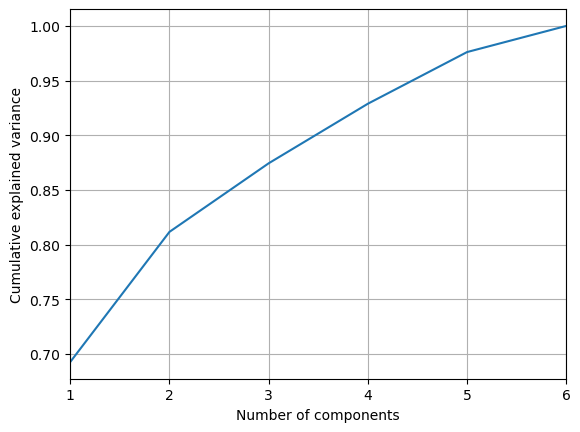

Cumulative explained variance with 6 components: 99.99999999999999%


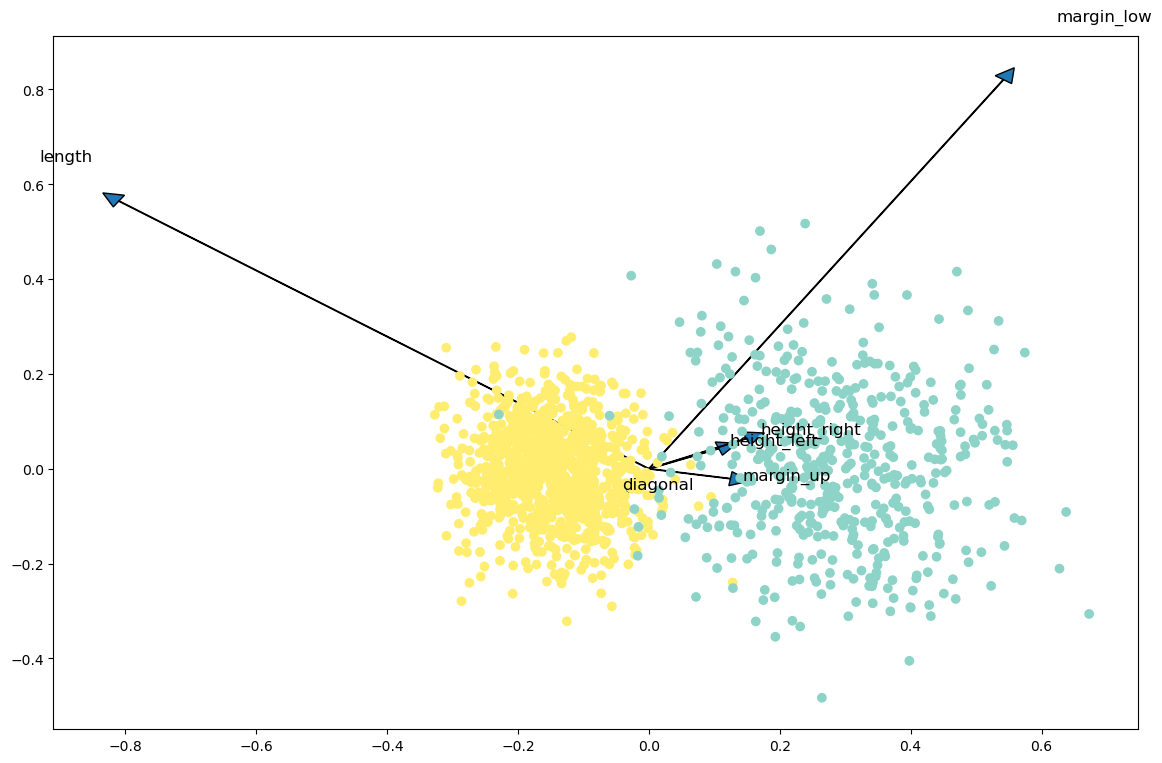

In [14]:
my = myPCA(df[features], 6)
my.cum_expl_variance()
my.biplot(df[target])